# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



1. Clean the data and perform some EDA and visualization to get to know the data set.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/willmayer/Desktop/DS3001/ds3001-linearRegression/04_hedonic_pricing/cars_hw.csv', low_memory=False)

**EDA**

<Axes: xlabel='Price', ylabel='Count'>

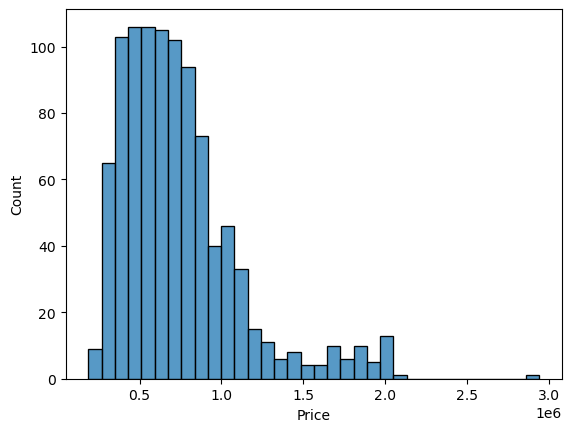

In [24]:
sns.histplot(df['Price'])

<Axes: xlabel='Price', ylabel='Mileage_Run'>

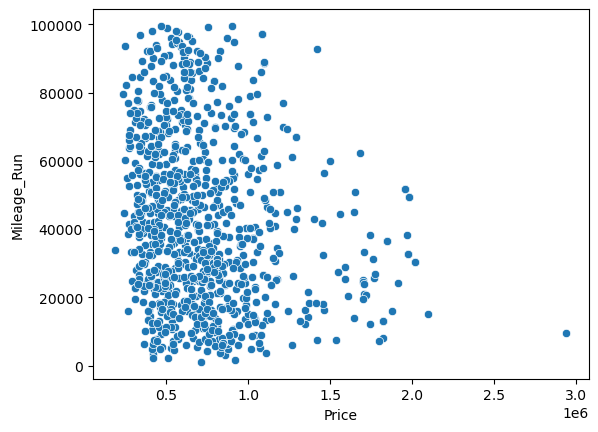

In [25]:
sns.scatterplot(df, x='Price', y='Mileage_Run')

<Axes: xlabel='Price', ylabel='Density'>

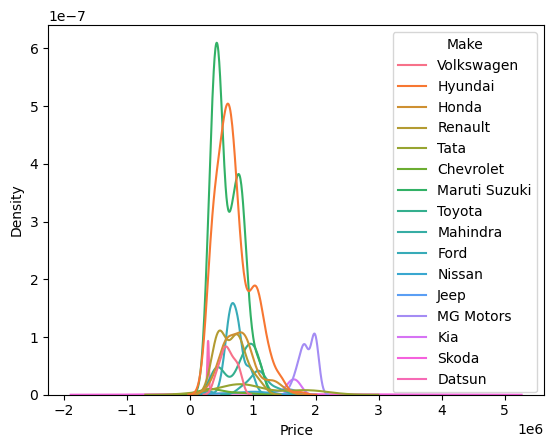

In [26]:
sns.kdeplot(df, x='Price', hue='Make')

**Cleaning**

In [27]:
df.columns

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

In [28]:
df = df.drop(columns=['Unnamed: 0'])

*Clean age*

In [29]:
df['age'] = max(df['Make_Year']) - df['Make_Year']

<Axes: ylabel='age'>

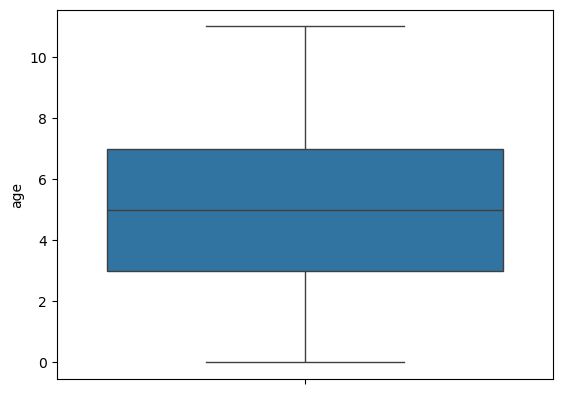

In [30]:
sns.boxplot(df['age'])

*Scale variables*

In [31]:
df['price_ihs'] = np.arcsinh(df['Price'])

<Axes: xlabel='price_ihs', ylabel='Count'>

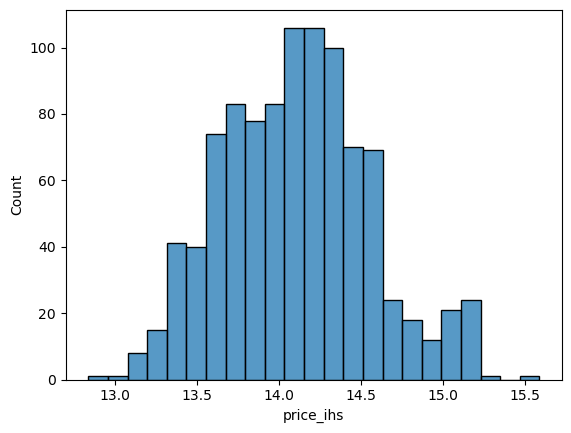

In [32]:
sns.histplot(df['price_ihs'])

In [33]:
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])

<Axes: xlabel='price_ihs', ylabel='mileage_ihs'>

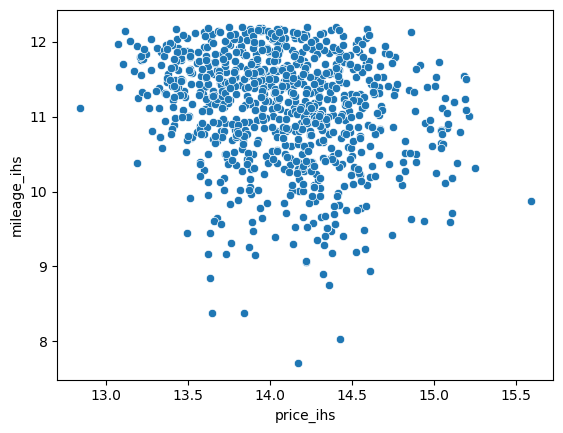

In [34]:
sns.scatterplot(df, x='price_ihs', y='mileage_ihs')

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [35]:
transform = ['Make', 'Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
dummies = []

test = pd.get_dummies(df.loc[:, 'Make'], drop_first=True, dtype='int')

for col in transform:
    dummies.append(pd.get_dummies(df.loc[:,col], drop_first=True, dtype='int'))

df = pd.concat([df.drop(columns=transform)] + dummies, axis=1)


3. Implement an ~80/~20 train-test split. Put the test data aside.

In [37]:
N = df.shape[0]
df = df.sample(frac=1)
train = int(.8*N)

df_train = df[0:train]
y_train = df_train['price_ihs']

df_test = df[train:]
y_test = df_test['price_ihs']

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [38]:
from sklearn.linear_model import LinearRegression

vars = ['age', 'mileage_ihs', 'Seating_Capacity']
X_train = df_train.loc[:, vars]
model = LinearRegression().fit(X_train, y_train)
X_test = df_test.loc[:, vars]
y_hat = model.predict(X_test)
print('Age, mileage (inverse hyperboolic sine), and seat capacity:')
print('R-squared:', model.score(X_test, y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE:', rmse)

Age, mileage (inverse hyperboolic sine), and seat capacity:
R-squared: 0.40956085746785187
RMSE: 0.33903942158688083
